# ARIMA Passengers, Freight, Mail

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from datetime import date


In [2]:
df = pd.read_csv("airline_portcountry.csv")
df.head()

,Month,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num
0,31048,Air Caledonie,New Caledonia,725,0.368,0.0,474,0.167,0.0,1985,1
1,31048,Air China,China,1311,9.158,0.0,1232,2.587,0.0,1985,1
2,31048,Air India,India,1423,44.823,0.0,970,6.708,0.0,1985,1
3,31048,Air India,Singapore,501,10.583,0.0,306,124.966,0.0,1985,1
4,31048,Air Nauru,Nauru,161,0.212,0.0,96,23.996,0.0,1985,1


In [3]:
cols = ['Month']
df.drop(cols, axis=1, inplace=True)

In [4]:
#how many rows
df.index
#df.head()

RangeIndex(start=0, stop=42643, step=1)

In [5]:
df = df.rename(columns={'Month_num': 'Month'})

In [6]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [7]:
df

,Airline,Port_Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month,Date
0,Air Caledonie,New Caledonia,725,0.368,0.0,474,0.167,0.0,1985,1,1985-01-01
1,Air China,China,1311,9.158,0.0,1232,2.587,0.0,1985,1,1985-01-01
2,Air India,India,1423,44.823,0.0,970,6.708,0.0,1985,1,1985-01-01
3,Air India,Singapore,501,10.583,0.0,306,124.966,0.0,1985,1,1985-01-01
4,Air Nauru,Nauru,161,0.212,0.0,96,23.996,0.0,1985,1,1985-01-01
...,...,...,...,...,...,...,...,...,...,...,...
42638,United Parcel Service,Singapore,0,0.000,0.0,0,65.909,0.0,2020,8,2020-08-01
42639,United Parcel Service,USA,0,1541.232,0.0,0,0.000,0.0,2020,8,2020-08-01
42640,Vietnam Airlines,Vietnam,104,434.326,0.0,839,381.540,0.0,2020,8,2020-08-01
42641,Virgin Australia,USA,0,23.011,0.0,0,40.233,0.0,2020,8,2020-08-01


In [8]:
df = df.set_index('Date')
df.index

DatetimeIndex(['1985-01-01', '1985-01-01', '1985-01-01', '1985-01-01',
               '1985-01-01', '1985-01-01', '1985-01-01', '1985-01-01',
               '1985-01-01', '1985-01-01',
               ...
               '2020-08-01', '2020-08-01', '2020-08-01', '2020-08-01',
               '2020-08-01', '2020-08-01', '2020-08-01', '2020-08-01',
               '2020-08-01', '2020-08-01'],
              dtype='datetime64[ns]', name='Date', length=42643, freq=None)

df['Passengers_In'] = df['Passengers_In']
df['Passengers_Out'] = df['Passengers_Out']
df['Freight_In_(tonnes)'] = df['Freight_In_(tonnes)']
df['Freight_Out_(tonnes)'] = df['Freight_Out_(tonnes)'] 
df['Mail_In_(tonnes)'] = df['Mail_In_(tonnes)'] 
df['Mail_Out_(tonnes)'] = df['Mail_Out_(tonnes)']

In [9]:
#df['Passengers_In']

In [10]:
total_pass = df['Passengers_In'] + df['Passengers_Out'] + 1
total_freight = df['Freight_In_(tonnes)'] + df['Freight_Out_(tonnes)'] + 1
total_mail = df['Mail_In_(tonnes)'] + df['Mail_Out_(tonnes)'] + 1

In [11]:
y1 = np.log(total_pass.resample('MS').mean())
y2 = np.log(total_freight.resample('MS').mean())
y3 = np.log(total_mail.resample('MS').mean())

In [12]:
#y1['2017':]

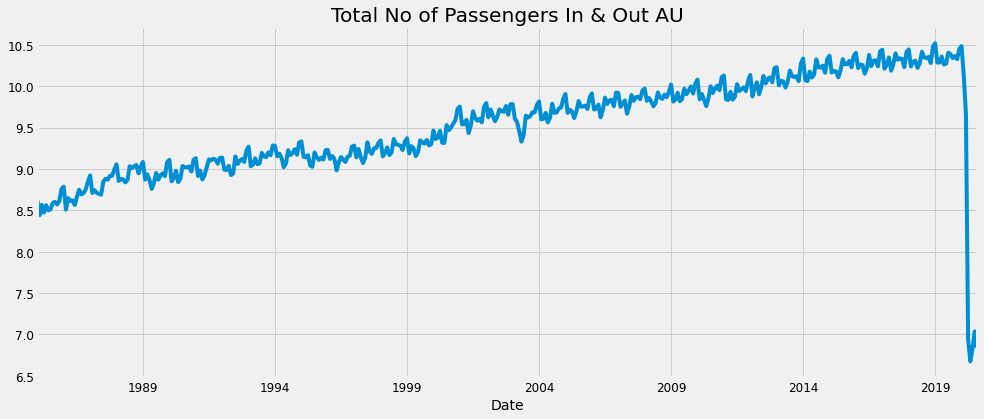

In [13]:
y1.plot(figsize=(15, 6))
plt.title("Total No of Passengers In & Out AU")
plt.show()

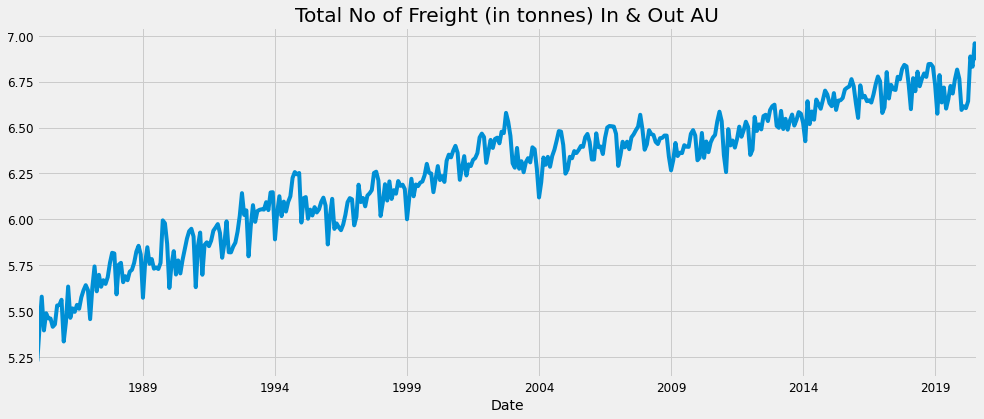

In [14]:
y2.plot(figsize=(15, 6))
plt.title("Total No of Freight (in tonnes) In & Out AU")
plt.show()

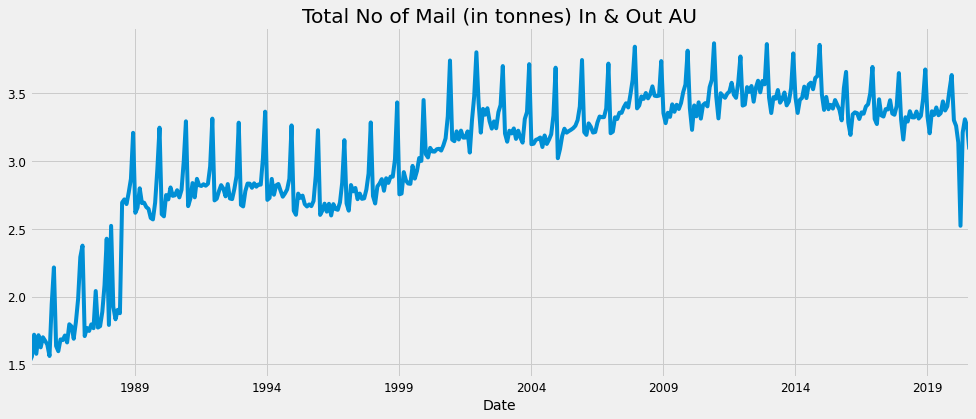

In [15]:
y3.plot(figsize=(15, 6))
plt.title("Total No of Mail (in tonnes) In & Out AU")
plt.show()

# Passengers

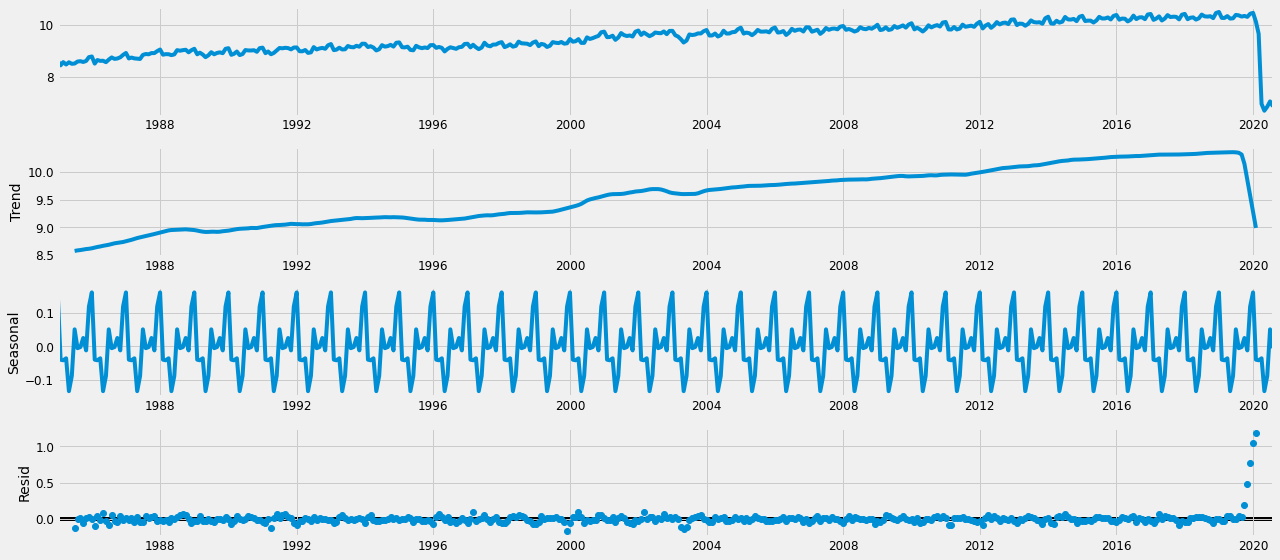

In [16]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decomposition.plot()
plt.show()

### Time series forecasting with ARIMA

In [17]:
#ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
#to use a “grid search” to find the optimal set of parameters that yields the best performance for our model

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3140.577362378569
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2534.007711269361
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:404.2318777142675
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:405.26242876641214
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:406.33994693933954
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:408.12054136474615
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:405.307187347936
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:407.03366533356814
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2557.146095841341


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2542.644320859026
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:42.808146391374294
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:52.52346627224753


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:418.90514538432785
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:46.385308499242825
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:51.968802291146716
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:54.46072458072575
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-307.081543504327
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-343.5064379938526
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-388.41537982985335
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-388.83877429958227
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-394.53004353253067
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-406.02960314508584
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-386.8752198442972
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-387.4019480052892
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-308.5118853689103
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-348.2407993485177
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-395.7468185729155
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-400.53159829416916
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-405.4456334803954
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-417.561

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-390.0256828251825
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-390.46584002699126
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-388.2840372663507
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-409.64962493028884
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-387.3516941367086
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-389.26738462921287
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-307.95915713892515
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-300.3705054047027
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-395.6885639593078
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-399.9358890438732
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-404.45999169091226
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-418.1435740360492
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-397.84667933633796


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-399.12332561434295
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-308.4740227527542
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-348.92784072759326
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-396.7398219143182


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-401.47645278911546
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-403.37474122826643
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-418.7312805345025
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-397.20070746837735
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-400.77132471070985
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-314.02180986318183
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-347.7456877036142
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-393.934837280789
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-398.54949108550625
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-402.3481015999371


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-415.4965732940578
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-395.867376716358
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-397.8366597208069


### Fitting the ARIMA model

In [19]:
mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0022      0.639      0.003      0.997      -1.250       1.255
ma.L1          0.1928      0.660      0.292      0.770      -1.101       1.486
ar.S.L12      -0.6153      0.283     -2.175      0.030      -1.170      -0.061
sigma2         0.0214      0.000     54.232      0.000       0.021       0.022


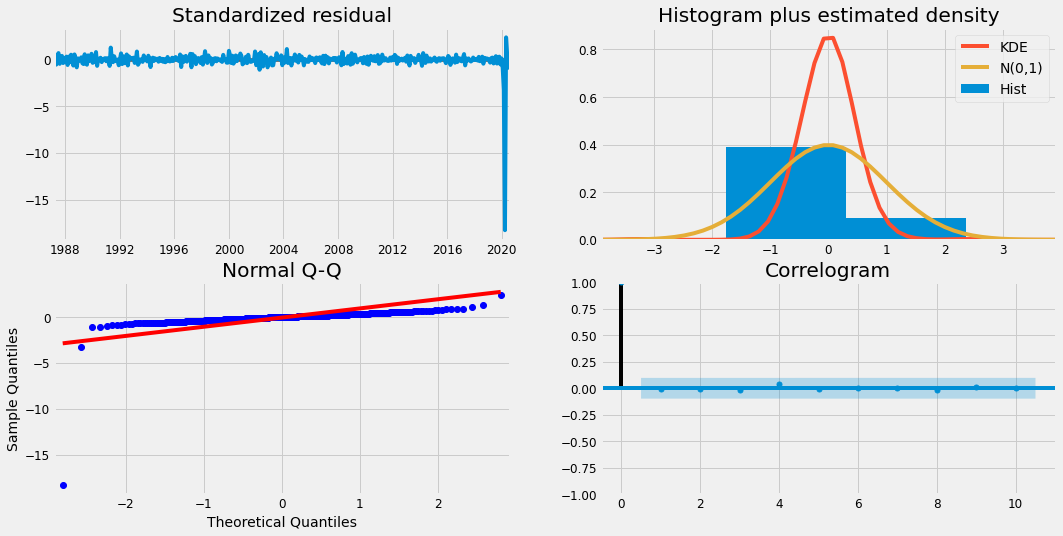

In [20]:
#to investigate any unusual behavior
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating forecasts

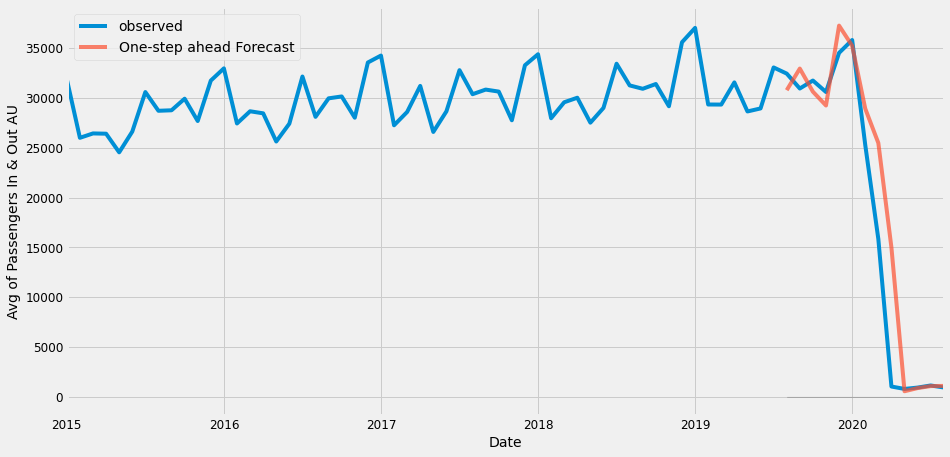

In [21]:
pred1 = results.get_prediction(start=pd.to_datetime('2019-08-01'), dynamic=False)
pred_ci = pred1.conf_int()
y1 = np.exp(y1) - 1
ax = y1['2015':].plot(label='observed')
pred1.predicted_mean = np.exp(pred1.predicted_mean) - 1
pred1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Avg of Passengers In & Out AU')
plt.legend()
plt.show()

In [22]:
y1_forecasted = pred1.predicted_mean
y1_truth = y1['2017-01-01':]
mse = ((y1_forecasted - y1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 24509126.29
The Root Mean Squared Error of our forecasts is 4950.67


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily number of passenger-in in the test set within 317349.13 of the real one.

### Producing and visualizing forecasts

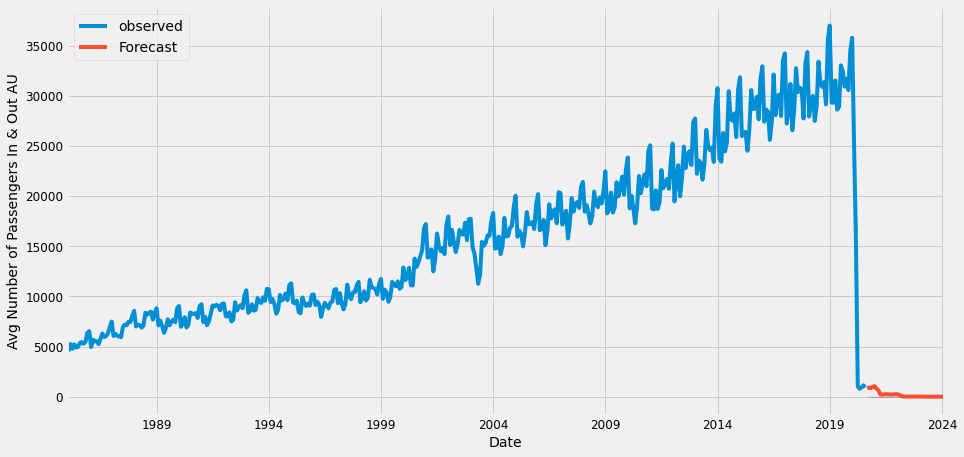

In [23]:
pred_uc = results.get_forecast(steps=42)
pred_ci = pred_uc.conf_int()
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean = np.exp(pred_uc.predicted_mean) - 1
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Avg Number of Passengers In & Out AU')
plt.legend()
plt.show()

# Freight

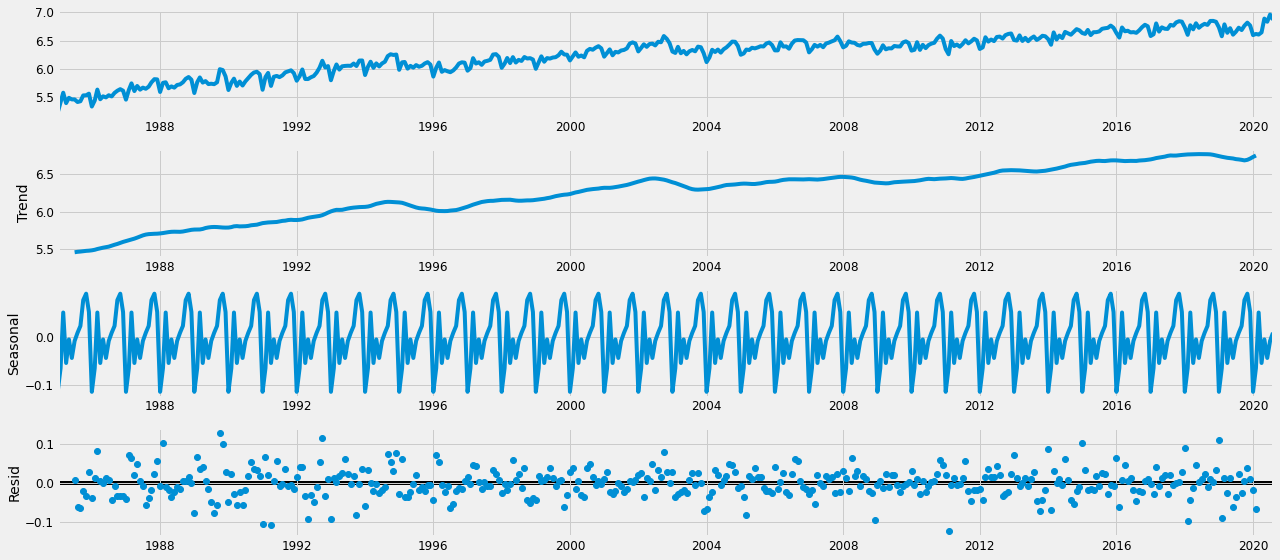

In [24]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2, model='additive')
fig = decomposition.plot()
plt.show()

In [25]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2780.34661160093
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2186.467891946758


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-838.0492512451701
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-811.4137441247283
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-913.3674149141666


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-944.7074942655579
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-812.6350740674571
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-876.4701939817069
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2201.2840380269595
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1624.9393453327166
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-1049.662847315694
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-1032.5148940467686
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-1102.030628132335
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-1160.3241368173394
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-1035.29860871838
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-1054.3057796882663
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-864.0349915508266
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-1034.5766141825916
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-1191.8324151742222
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-1326.167361215877
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-1241.9826402630235
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-1376.557519891175
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-1262.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-1309.9517705252192
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-1366.2620580928512
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-861.1522443695676
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-1034.3050871900277
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-1237.9016273899233


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-1339.1693958107567
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-1239.9850602174079
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-1377.1802745153418
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-1289.7293416646544
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-1336.15474651344
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-947.3266826160403
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-1078.197246108038
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-1249.5622594817664
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-1373.4672608286637
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-1279.1433520442258
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-1417.409467191519
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-1319.4469464439521
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-1372.1138605448057
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-894.7544871142768


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-1059.7280990826398
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-1224.4810914145128
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-1360.9982169353757
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-1270.0894064135523
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-1410.9520009369967
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-1296.22728161535
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-1359.4600904305382
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-964.1369479550974
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-1095.410274340008
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-1226.8739415794862
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-1369.7597786611022
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-1278.1511069910212
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-1417.9628600503725
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-1306.0619300983485
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1368.250993615901


In [27]:
mod = sm.tsa.statespace.SARIMAX(y2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2836      0.098      2.886      0.004       0.091       0.476
ma.L1         -0.6386      0.081     -7.859      0.000      -0.798      -0.479
ar.S.L12      -0.1123      0.068     -1.645      0.100      -0.246       0.022
ma.S.L12      -0.7406      0.047    -15.627      0.000      -0.833      -0.648
sigma2         0.0018   9.51e-05     19.376      0.000       0.002       0.002


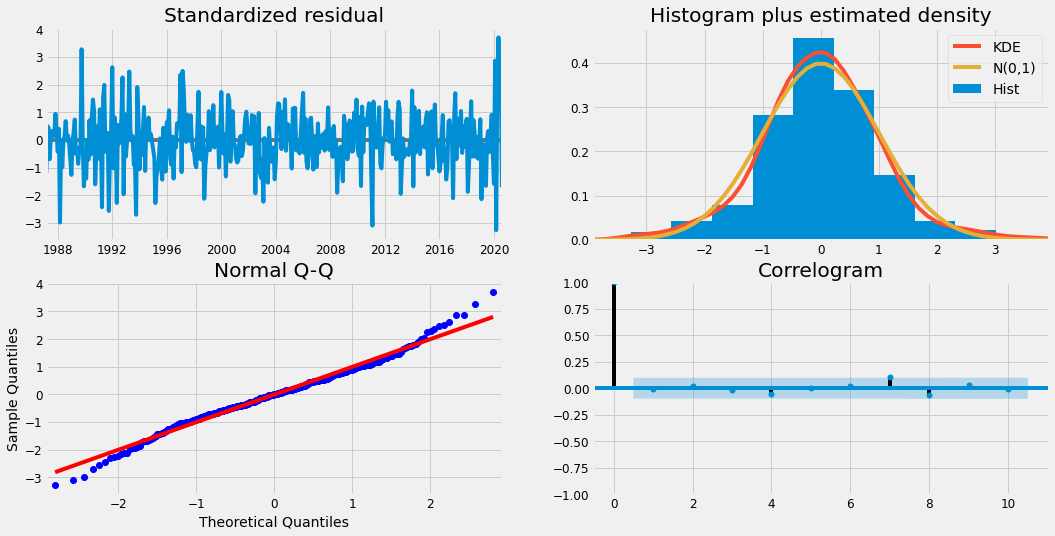

In [28]:
results2.plot_diagnostics(figsize=(16, 8))
plt.show()

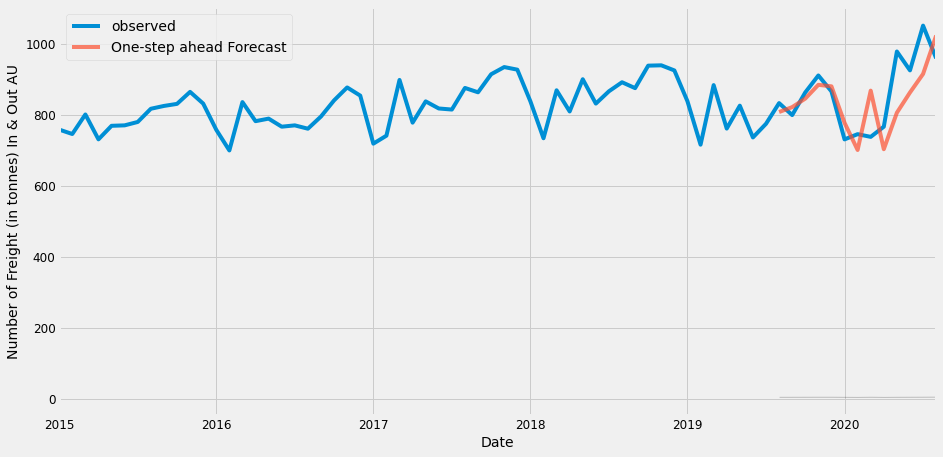

In [29]:
pred2 = results.get_prediction(start=pd.to_datetime('2019-08-01'), dynamic=False)
pred_ci = pred2.conf_int()
y2 = np.exp(y2) - 1
ax = y2['2015':].plot(label='observed')
pred2.predicted_mean = np.exp(pred2.predicted_mean) - 1
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Freight (in tonnes) In & Out AU')
plt.legend()
plt.show()

In [30]:
y2_forecasted = pred2.predicted_mean
y2_truth = y2['2017-01-01':]
mse = ((y2_forecasted - y2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 6435.14
The Root Mean Squared Error of our forecasts is 80.22


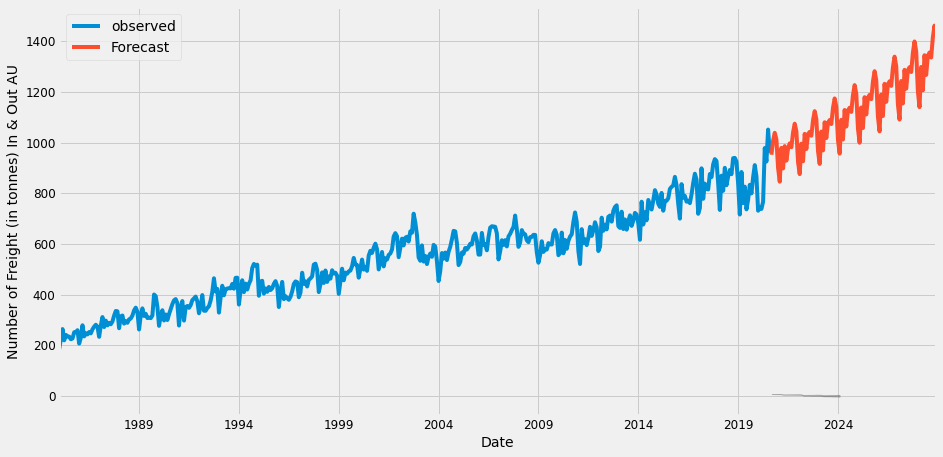

In [31]:
pred_uc2 = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
pred_uc2.predicted_mean = np.exp(pred_uc2.predicted_mean) - 1
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Freight (in tonnes) In & Out AU')
plt.legend()
plt.show()

# Mail

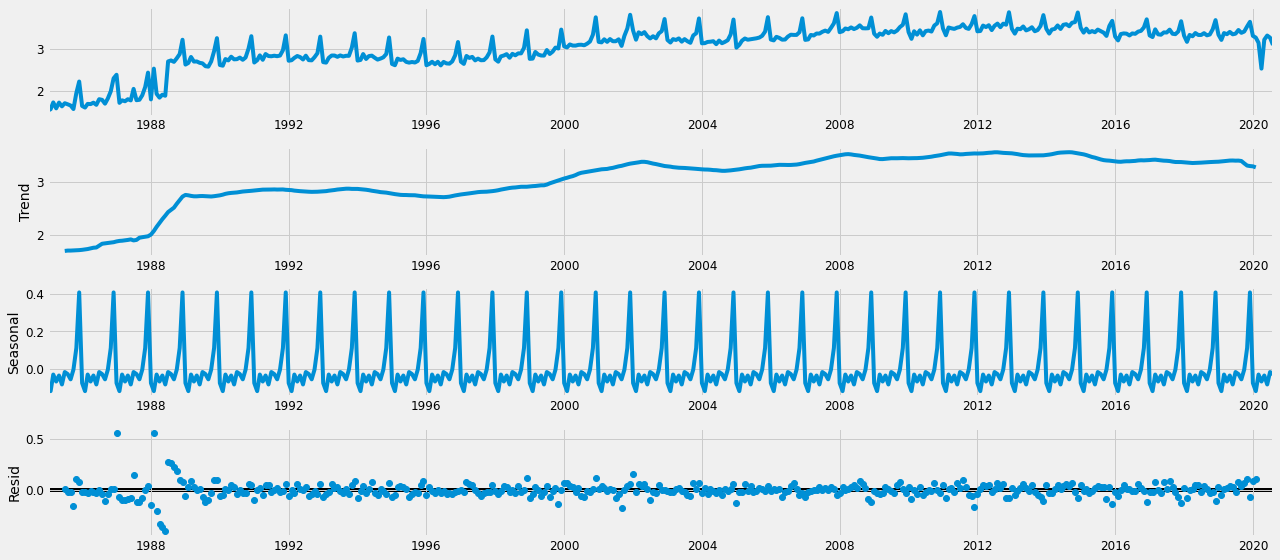

In [32]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y3, model='additive')
fig = decomposition.plot()
plt.show()

In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2176.3660853287624
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1605.8658519468984
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-229.24949970030082
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-228.18400882110024
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-240.2406541016425
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-237.7574045934831
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-213.3811839734228
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-298.02347684666483
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1632.2961451109531
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1091.248007175158
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-374.45984974240815
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-391.99748884744724
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-381.3991568978357
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-396.01853035035055
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-379.9373289571845
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-437.86685246569937
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-142.99172817348625
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-307

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-404.28880065647905
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-527.6601653921699
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-721.9712564332526
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-564.4018973908923
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-721.3186445348957
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-533.5560468729918
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-713.3667720773045
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-182.69280182906235
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-363.6951487050053
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-483.1461107963339
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-688.3094570110757
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-530.2062509163496
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-683.5953153326948
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-606.9384616158384
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-676.1966514399386
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-264.9065052422129
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-413.4444310843072
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-511.0461

In [34]:
mod = sm.tsa.statespace.SARIMAX(y3,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results3 = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1575      0.055      2.889      0.004       0.051       0.264
ma.L1         -0.6437      0.052    -12.333      0.000      -0.746      -0.541
ar.S.L12      -0.1541      0.029     -5.275      0.000      -0.211      -0.097
ma.S.L12      -0.7609      0.045    -16.771      0.000      -0.850      -0.672
sigma2         0.0094      0.000     33.197      0.000       0.009       0.010


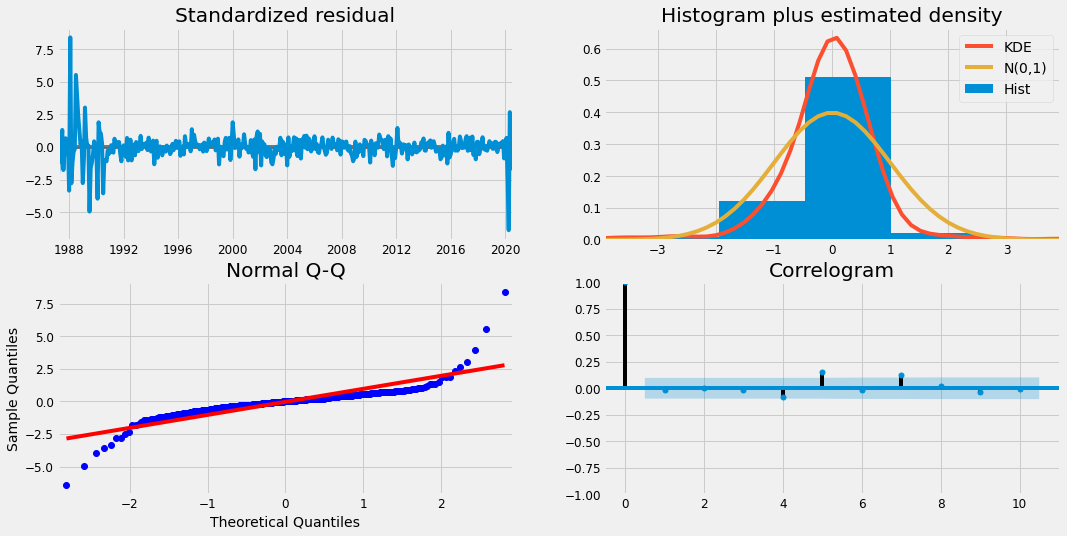

In [35]:
results3.plot_diagnostics(figsize=(16, 8))
plt.show()

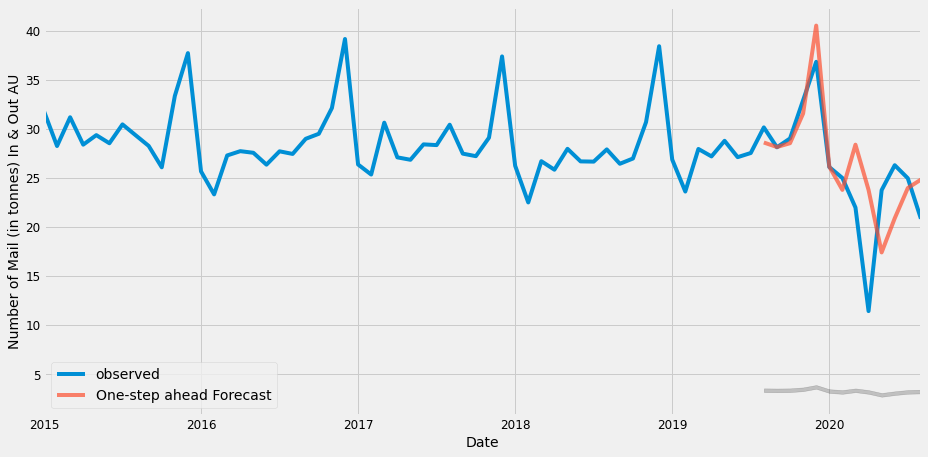

In [36]:
pred3 = results.get_prediction(start=pd.to_datetime('2019-08-01'), dynamic=False)
pred_ci = pred3.conf_int()
y3 = np.exp(y3) - 1
ax = y3['2015':].plot(label='observed')
pred3.predicted_mean = np.exp(pred3.predicted_mean) - 1
pred3.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Mail (in tonnes) In & Out AU')
plt.legend()
plt.show()

In [37]:
y3_forecasted = pred3.predicted_mean
y3_truth = y3['2017-01-01':]
mse = ((y3_forecasted - y3_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 23.04
The Root Mean Squared Error of our forecasts is 4.8


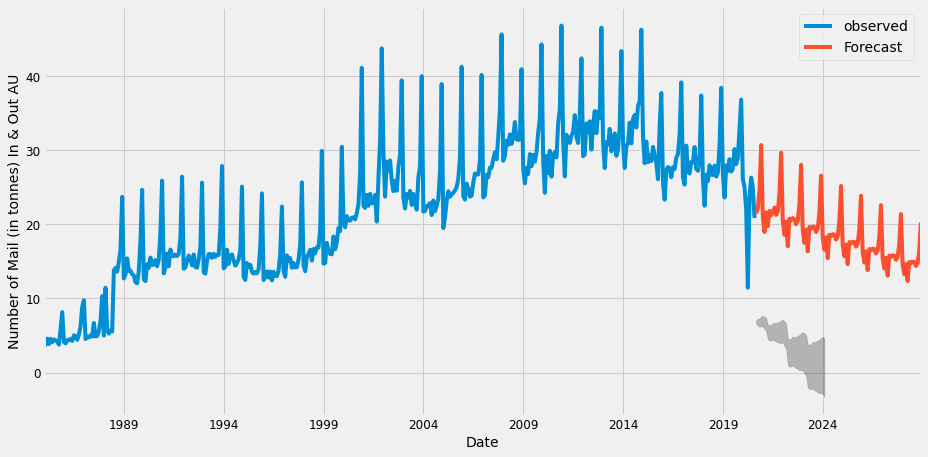

In [38]:
pred_uc3 = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y3.plot(label='observed', figsize=(14, 7))
pred_uc3.predicted_mean = np.exp(pred_uc3.predicted_mean) - 1
pred_uc3.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Mail (in tonnes) In & Out AU')
plt.legend()
plt.show()